<center><h1> <font color='green'>DESAFIO : -Variable Aleatoria 2</font></h1></center>
<center><h1> <font color='yellow'>Vinka Arias Barrios</font></h1></center>

In [57]:
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')


In [59]:
## Leer archivo csv 
dataset = pd.read_csv("world-data-2023.csv")
dataset.shape

(195, 35)

In [61]:
#dataset tiene 195 filas y 35 columnas

<left><h2> <font color='yellow'>1. Carga los datos y genera un dataFrame que excluya las columnas :  abreviatura del país, código de llamada, capital, código de moneda, ciudad más 
grande, lenguaje oficial, latitud y longitd
.
 Considerando estos datos, realizauna 
inspección inicial sobre ellos, coidensrando Gráfics .concluye
 </font><leftr>

In [64]:
# Excluimos las columnas

columns_excluidas = ['Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code',  'Largest city','Official language', 'Latitude', 'Longitude']
dataset_filtrado = dataset.drop(columns=columns_excluidas)

dataset_filtrado.shape
#tenemos 195 columns y 27 filas, se restaron las columnas excluidas

(195, 27)

In [66]:
dataset_filtrado .info()
#vemos que ninguna columna tiene 195 filas por lo tanto hay que limpiar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

In [68]:
# Paso 1: Eliminar valores NaN
dataset_limpio = dataset_filtrado.dropna()

# Paso 2: Eliminar filas duplicadas
dataset_limpio = dataset_limpio.drop_duplicates()


In [70]:
dataset_limpio.shape
#nos muestra que tiene 120 filas y 27 columnas

(120, 27)

In [72]:
dataset_limpio.info()
#vemos que todas las columna tiene 120 filas por lo tanto no hay repetidos

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    120 non-null    object 
 1   Density
(P/Km2)                            120 non-null    object 
 2   Agricultural Land( %)                      120 non-null    object 
 3   Land Area(Km2)                             120 non-null    object 
 4   Armed Forces size                          120 non-null    object 
 5   Birth Rate                                 120 non-null    float64
 6   Co2-Emissions                              120 non-null    object 
 7   CPI                                        120 non-null    object 
 8   CPI Change (%)                             120 non-null    object 
 9   Fertility Rate                             120 non-null    float64
 10  Forested Area (%)              

In [74]:
dataset_limpio.isnull().sum()
#validacion datos faltantes: 0

Country                                      0
Density\n(P/Km2)                             0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Life expectancy                              0
Maternal mortality ratio                     0
Minimum wage                                 0
Out of pocket health expenditure             0
Physicians per thousand                      0
Population   

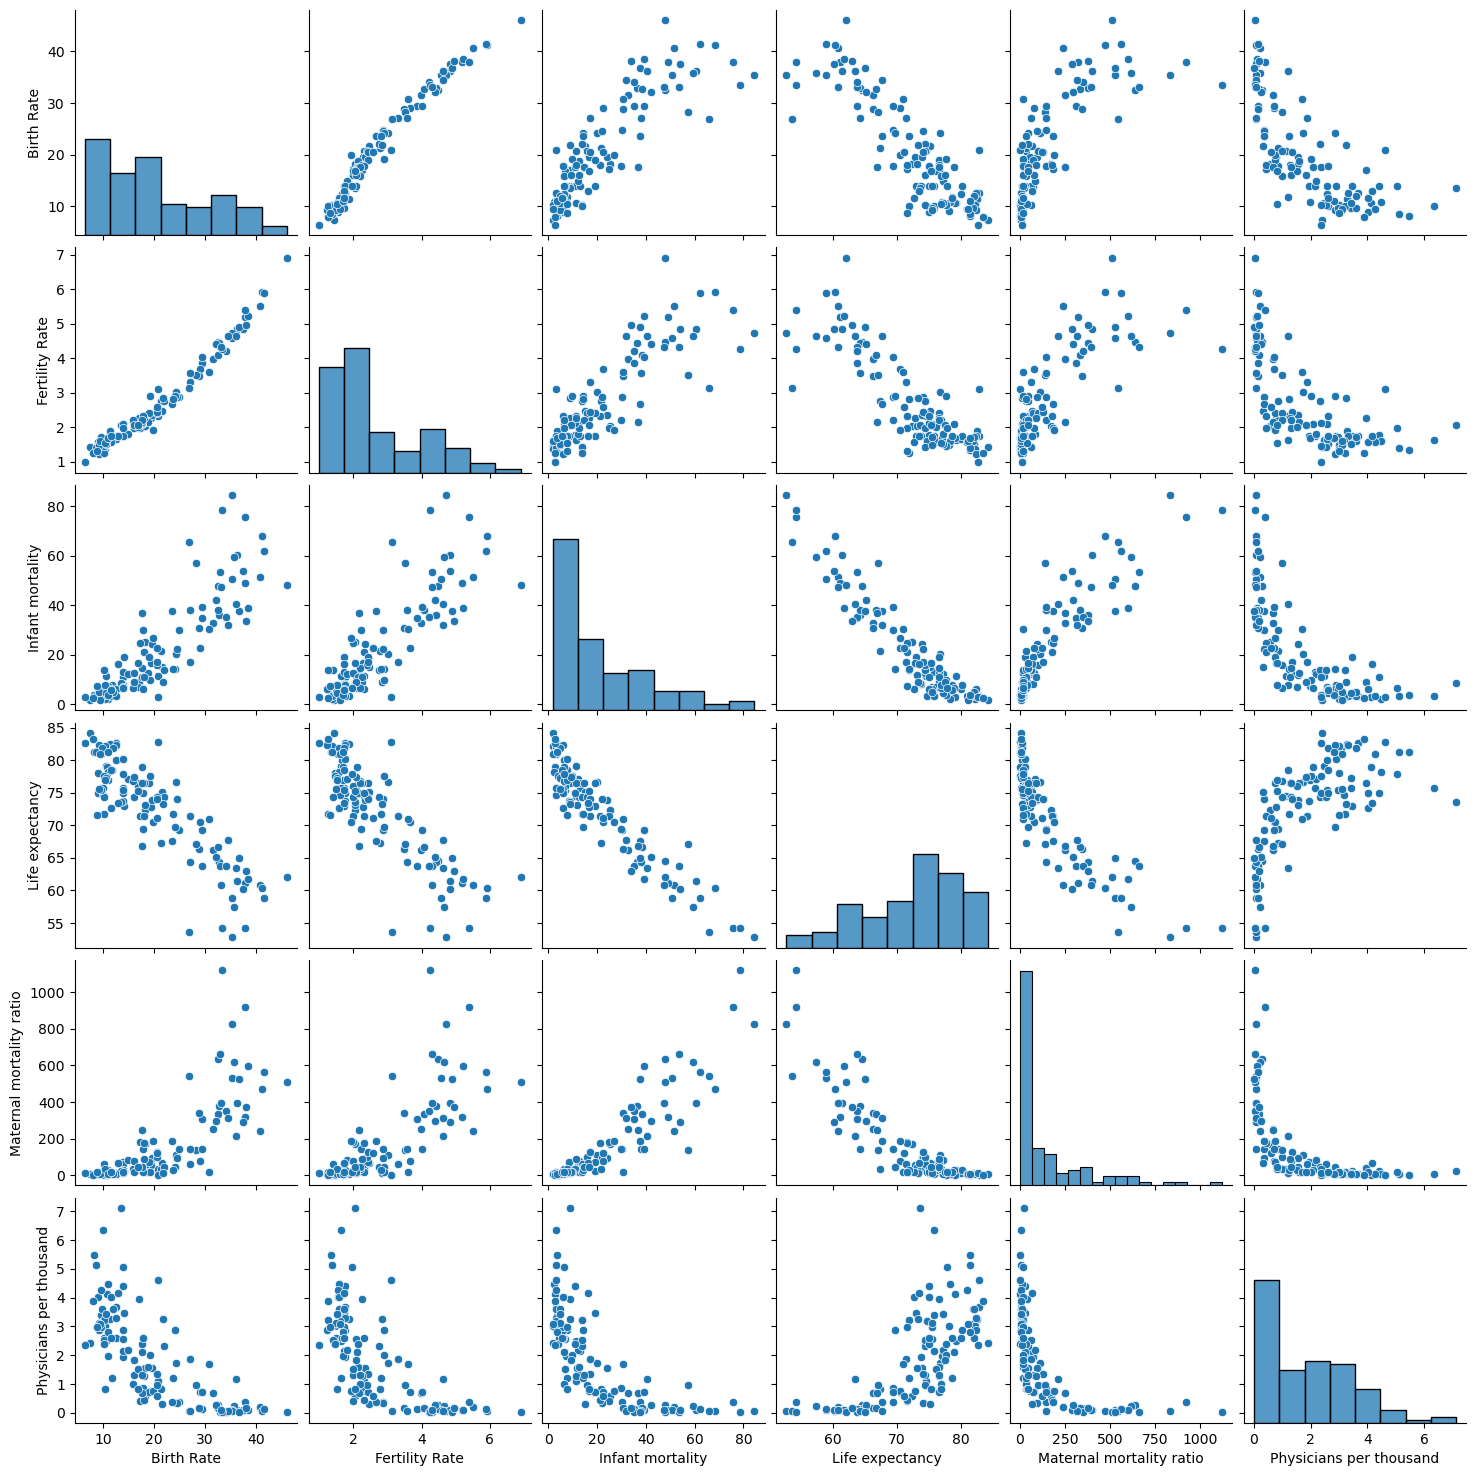

In [76]:
# Seleccionar solo las columnas numéricas para la visualización
numerical_data = dataset_limpio.select_dtypes(include='number').dropna()
sns.pairplot(numerical_data)

<left><h2> <font color='yellow'>
2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?
 </font><left>

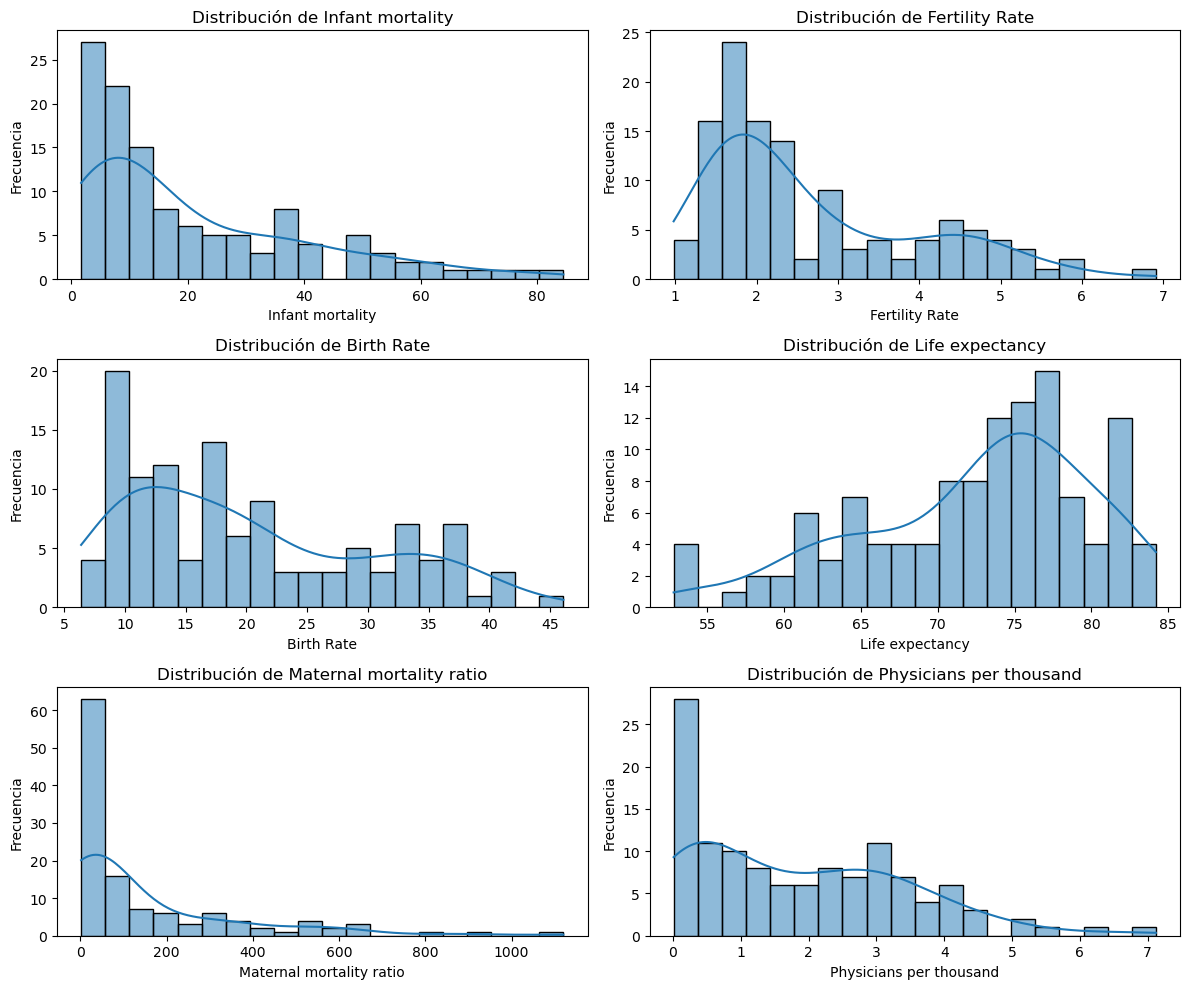

In [78]:
#Para variables de naturaleza cuantitativa discreta o contínua

# Gráficos de distribución para algunas variables clave
columns_to_plot = ['Infant mortality', 'Fertility Rate', 'Birth Rate', 'Life expectancy', 'Maternal mortality ratio','Physicians per thousand']

plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset_limpio[col].dropna(), bins=20, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

 # 2 variasbles co-relacionadas son Maternal mortality ratio e Infanty mortality por que las curvas del histograma es ascendente en ambos casos




<left><h2> <font color='yellow'>3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimient </font><left>o

In [81]:
# Seleccionar columnas de interés
columnas_interes = ['Maternal mortality ratio', 'Infant mortality']
dataset_corelacion = dataset_limpio[columnas_interes]

# Eliminar valores faltantes
dataset_corelacion_limpio = dataset_corelacion.dropna()

dataset_corelacion_limpio.isnull().sum()
#validacion datos faltantes: 0

dataset_corelacion_limpio.shape

(120, 2)

In [82]:
dataset_corelacion_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 193
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Maternal mortality ratio  120 non-null    float64
 1   Infant mortality          120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


In [83]:
dataset_corelacion_limpio.isnull().sum()
#validacion datos faltantes: 0


Maternal mortality ratio    0
Infant mortality            0
dtype: int64

In [84]:

# Convertir a numérico
#data_selected['Maternal mortality ratio'] = pd.to_numeric(data_selected['Maternal mortality ratio'], errors='coerce')
#data_selected['Infant mortality'] = pd.to_numeric(data_selected['Infant mortality'], errors='coerce')

# Eliminar outliers utilizando el método IQR
Q1 = dataset_corelacion_limpio.quantile(0.25)
Q3 = dataset_corelacion_limpio.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Filtrar los datos que están dentro de los límites
dataset_corelacion_limpio_no_outliers = dataset_corelacion_limpio[~((dataset_corelacion_limpio < lower_bound) | (dataset_corelacion_limpio > upper_bound)).any(axis=1)]

# Mostrar los primeros datos limpios
dataset_corelacion_limpio_no_outliers.shape



(107, 2)

In [86]:
dataset_corelacion_limpio_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1 to 193
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Maternal mortality ratio  107 non-null    float64
 1   Infant mortality          107 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [91]:
dataset_corelacion_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 193
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Maternal mortality ratio  120 non-null    float64
 1   Infant mortality          120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


<left><h2> <font color='yellow'>4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los
datos preparados. Compara con lo obtenido anteriormente. </font><left>

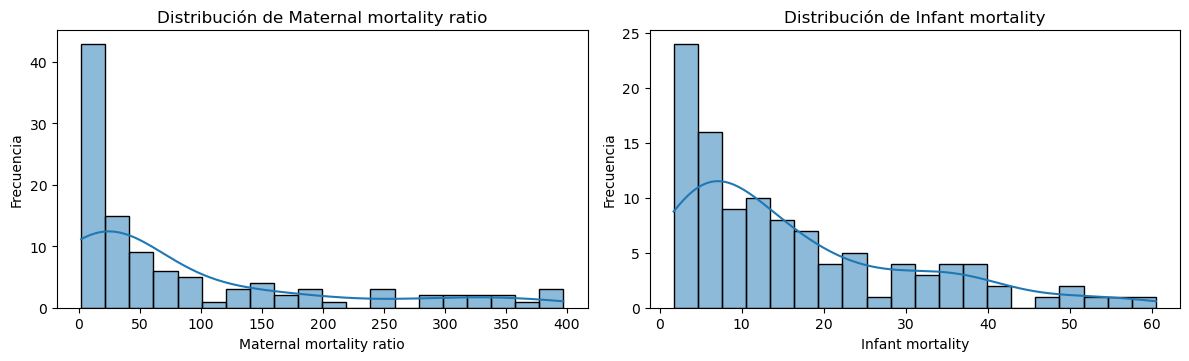

In [96]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_interes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset_corelacion_limpio_no_outliers[col].dropna(), bins=20, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

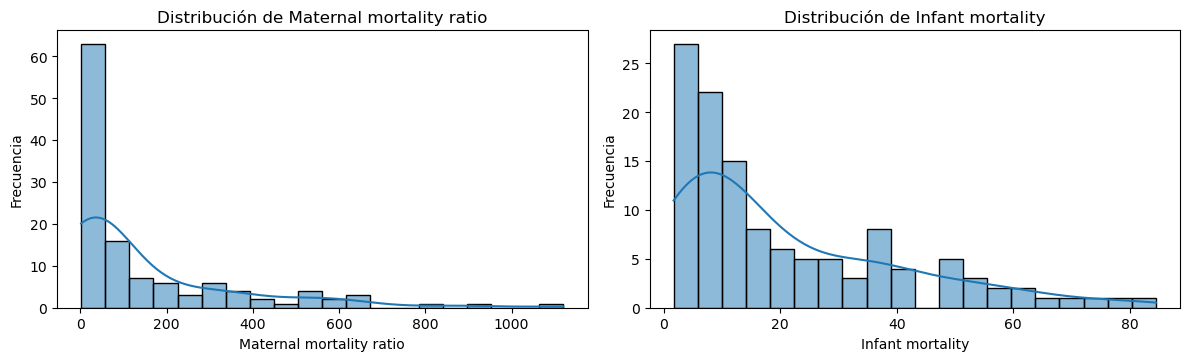

In [98]:
# Gráficos anterior
columns_to_plot = ['Maternal mortality ratio','Infant mortality']

plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset_limpio[col].dropna(), bins=20, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### en ambas variables se oberva una minima diferencia en la cantidad 

<left><h2> <font color='yellow'>
5. Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?
 </font><left>

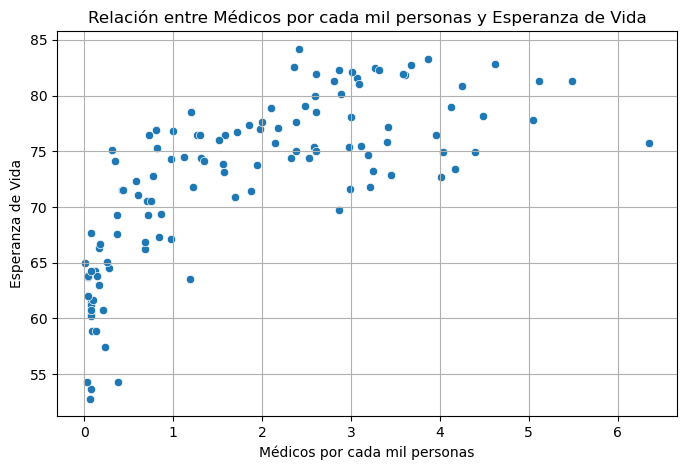

,Physicians per thousand,Life expectancy
0,0.28,64.5
1,1.20,78.5
2,1.72,76.7
4,0.21,60.8
6,3.96,76.5


In [106]:
# Seleccionar columnas de interés
column_compara = ['Physicians per thousand','Life expectancy']
dataset_corelacion2 = dataset_limpio[column_compara]


# Convertir a numérico, gestionando valores no numéricos como NaN.
dataset_corelacion2['Physicians per thousand'] = pd.to_numeric(dataset_corelacion2['Physicians per thousand'], errors='coerce')
dataset_corelacion2['Life expectancy'] = pd.to_numeric(dataset_corelacion2['Life expectancy'], errors='coerce')


# Eliminar valores faltantes
dataset_corelacion_limpio2 = dataset_corelacion2.dropna()

# Identificación y eliminación de outliers usando el método del rango intercuartílico (IQR).
Q1 = dataset_corelacion_limpio2.quantile(0.25)
Q3 = dataset_corelacion_limpio2.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar los outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los outliers.
dataset_corelacion_limpio2_no_outliers = dataset_corelacion_limpio2[~((dataset_corelacion_limpio2 < lower_bound) | (dataset_corelacion_limpio2 > upper_bound)).any(axis=1)]

# Visualizar la relación entre la cantidad de médicos por cada mil personas y la esperanza de vida.
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Physicians per thousand', y='Life expectancy', data=dataset_corelacion_limpio2_no_outliers)
plt.title('Relación entre Médicos por cada mil personas y Esperanza de Vida')
plt.xlabel('Médicos por cada mil personas')
plt.ylabel('Esperanza de Vida')
plt.grid(True)
plt.show()

# Mostrar las primeras filas del dataframe limpio para referencia.
dataset_corelacion_limpio2_no_outliers.head()







Se observa una tendencia ascendente en el gráfico, lo que sugiere que a medida que aumenta la cantidad de médicos por cada mil personas, la ## esperanza de vida también tiende a aumentar.

<left><h2> <font color='yellow'>
6. Construye un gráfico para representar la población total de los países y su producto
interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia
y/o transforma los datos). Justifica </font><left>


In [126]:
# Seleccionar columnas de interés
column_compara3 = ['Population','GDP']
dataset_corelacion2 = dataset_limpio[column_compara3]
# Convertir a numérico, limpiando caracteres no deseados como comas
dataset_corelacion2['Population'] = pd.to_numeric( dataset_corelacion2['Population'].astype(str).str.replace(',', ''), errors='coerce')
dataset_corelacion2['GDP'] = pd.to_numeric( dataset_corelacion2['GDP'].astype(str).str.replace(',', ''), errors='coerce'
)


dataset_corelacion2

,Population,GDP
0,38041754,NaN
1,2854191,NaN
2,43053054,NaN
4,31825295,NaN
6,44938712,NaN
...,...,...
185,66834405,NaN
186,328239523,NaN
187,3461734,NaN
191,96462106,NaN


In [128]:

# Eliminar filas con valores faltantes
dataset_corelacion2_limpio= dataset_corelacion2.dropna()

# Filtrar datos para eliminar registros con población o PIB <= 0
dataset_corelacion2_limpio

,Population,GDP


In [130]:
dataset_corelacion2_limpio.shape

(0, 2)

In [132]:
dataset_corelacion2_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  0 non-null      int64  
 1   GDP         0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 0.0 bytes


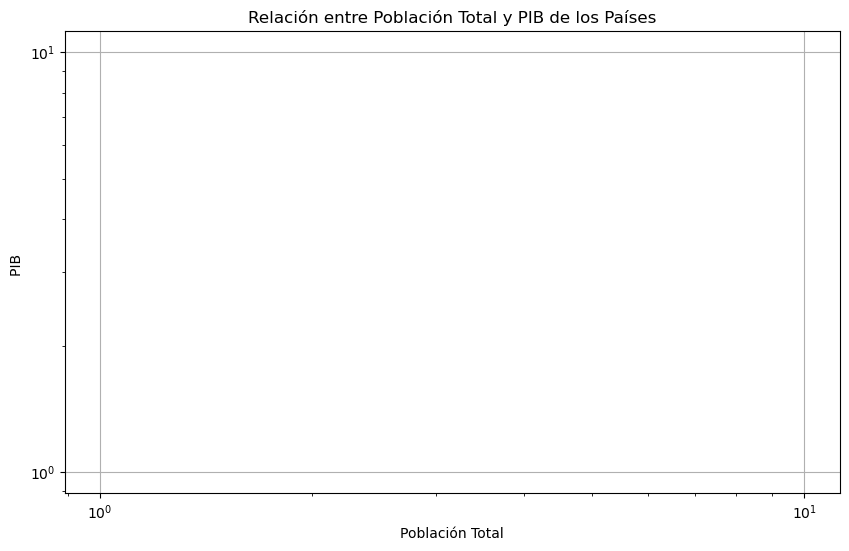

In [134]:

# Visualización de la relación entre la Población total y el PIB utilizando un scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='GDP', data=dataset_corelacion2_limpio, alpha=0.7)


# Ajustar la escala del eje X y Y para mejor visualización debido a la gran disparidad entre países.
plt.xscale('log')
plt.yscale('log')

# Añadir etiquetas y título
plt.title('Relación entre Población Total y PIB de los Países')
plt.xlabel('Población Total')
plt.ylabel('PIB ')
plt.grid(True)
plt.show()




## utilice Scatterplot Adecuado para observar la relación entre dos variables continuas (en este caso, Population y GDP) pero no muestra relacion entre las variables porque GDP no tiene informacionleft>